## Data visualization

In [12]:
import numpy as np

means = []
variances = []

#Create a numpy array "patch" that contains 3 4x4 images
patch = np.random.rand(3,4,4)

total_mean = np.mean(patch)
total_std = np.std(patch)

print(f"Total mean: {total_mean} / Total std: {total_std}")

means.extend([np.mean(img) for img in patch])
variances.extend([np.mean((img - np.mean(img))**2) for img in patch])

AAmean = np.mean(means)
AAstd = np.sqrt(np.mean(variances))

print(f"AA mean: {AAmean} / AA std: {AAstd}")

Total mean: 0.5138211397115615 / Total std: 0.26161955358598615
AA mean: 0.5138211397115616 / AA std: 0.26094809876300734


### LIBRARIES AND PATH

In [13]:
%matplotlib widget


In [14]:
import nibabel as nib
import numpy as np
import os

data_path = '/data/falcetta/datasets/preprocess_OASIXI/train'
preprocessed_data_path = '/data/falcetta/datasets/VC_datasets/AL/results/preprocessed_images_OASIXI_32'
preprocessed_data_path = '/data/falcetta/datasets/preprocess_OASIXI/patches_preprocessed'



data_path = "/data/falcetta/brain_data/IXI/processed/numpy_renamed/train"
preprocessed_data_path ="/data/falcetta/brain_data/IXI/processed/numpy_renamed/patches_preprocessed"


data_path = "/data/falcetta/brain_data/CAS/preprocessed/numpy/train"
preprocessed_data_path = "/data/falcetta/brain_data/CAS/preprocessed/numpy/patches_preprocessed"

data_path = "/home/falcetta/IXI/processed/numpy_renamed/train"
preprocessed_data_path = "/home/driss/data_vessel_npy/"

ID = '002'


In [5]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
plt.ion() 

def plot_slices_with_cursor(img_np, mask_np, vessel_np, grid_np=None, cursor_position=10):
    if grid_np is None:
        
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        
        def update(val):
            slice_index = int(slider.val)
            ax[0].imshow(img_np[:,:,slice_index], cmap='gray')
            ax[0].set_title(f'Image Slice {slice_index}')
            ax[1].imshow(mask_np[:,:,slice_index], cmap='gray')
            ax[1].set_title(f'Mask Slice {slice_index}')
            ax[2].imshow(vessel_np[:,:,slice_index], cmap='gray')
            ax[2].set_title(f'Vessel Slice {slice_index}')
            fig.canvas.draw_idle()

        slider_ax = plt.axes([0.1, 0.01, 0.65, 0.03])
        slider = Slider(slider_ax, 'Slice', 0, img_np.shape[2] - 1, valinit=cursor_position, valstep=1)
        slider.on_changed(update)
        plt.subplots_adjust(bottom=0.2)

        # Initialize the plot
        update(cursor_position)
    else:
        fig, ax = plt.subplots(2, 2, figsize=(15, 10))
        
        def update(val):
            slice_index = int(slider.val)
            ax[0, 0].imshow(img_np[:,:,slice_index], cmap='gray')
            ax[0, 0].set_title(f'Image Slice {slice_index}')
            ax[0, 1].imshow(mask_np[:,:,slice_index], cmap='gray')
            ax[0, 1].set_title(f'Grid Slice {slice_index}')
            ax[1, 0].imshow(vessel_np[:,:,slice_index], cmap='gray')
            ax[1, 0].set_title(f'Vessel Slice {slice_index}')
            ax[1, 1].imshow(grid_np[:,:,slice_index], cmap='gray')
            ax[1, 1].set_title(f'Rough Slice {slice_index}')
            
            fig.canvas.draw_idle()

        slider_ax = plt.axes([0.1, 0.01, 0.65, 0.03])
        slider = Slider(slider_ax, 'Slice', 0, img_np.shape[2] - 1, valinit=cursor_position, valstep=1)
        slider.on_changed(update)
        plt.subplots_adjust(bottom=0.2)

        # Initialize the plot
        update(cursor_position)
        
    
    plt.show()

### ORIGINAL DATA

In [15]:
all_files = os.listdir(data_path)
all_mask  = [file for file in all_files if 'mask' in file]
all_vessel = [file for file in all_files if 'vessel' in file]
all_img = [file for file in all_files if 'mask' not in file and 'vessel' not in file]
all_ids = [file.split('_')[0] for file in all_img]
assert len(all_mask) == len(all_vessel) == len(all_img)

print('Number of images: ', len(all_img))
print(f"Ids: {all_ids}")

Number of images:  22
Ids: ['002', '009', '007', '013', '004', '011', '006', '020', '010', '018', '019', '022', '005', '003', '015', '001', '017', '008', '016', '014', '021', '012']


In [16]:
# Extract the Image that starts with the ID
img = [file for file in all_img if file.startswith(str(ID))]
mask = [file for file in all_mask if file.startswith(str(ID))]
vessel = [file for file in all_vessel if file.startswith(str(ID))]

assert len(img) == len(mask) == len(vessel) == 1, f'Found more than one file for ID {ID}: {img}, {mask}, {vessel}'

img = img[0]
mask = mask[0]
vessel = vessel[0]

print(f'IMG: {img}')
print(f'MASK: {mask}')
print(f'VESSEL: {vessel}')

IMG: 002_IXI012-HH-1211-MRA_ToF.nii.gz
MASK: 002_IXI012-HH-1211-MRA_brain_mask.nii.gz
VESSEL: 002_IXI012-HH-1211-MRA_vessel.nii.gz


In [17]:
img_np = nib.load(os.path.join(data_path, img)).get_fdata()
rough_mask_np = nib.load(os.path.join(data_path, mask)).get_fdata()
true_image_np = nib.load(os.path.join(data_path, vessel)).get_fdata()

assert img_np.shape == rough_mask_np.shape == true_image_np.shape
print(f'Image shape: {img_np.shape}')

Image shape: (373, 481, 99)


Text(0.5, 1.0, 'Original Image')

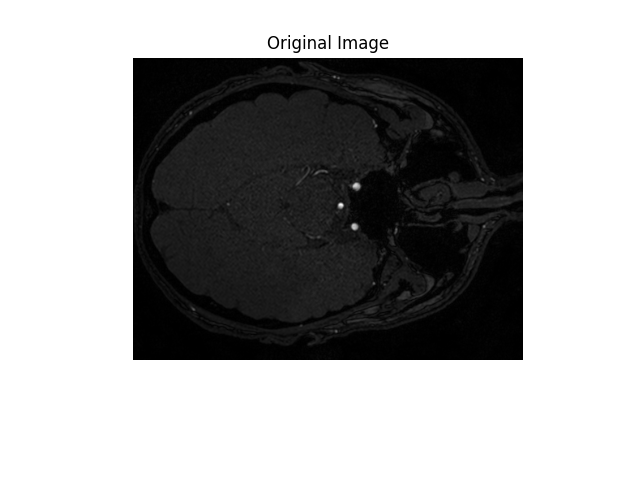

In [18]:
# NON SERVE A NIENTE MA LO LASCIAMO PERCHE' COSI DOPO FUNZIONA
fig, ax = plt.subplots(1, 1)
plt.subplots_adjust(bottom=0.25)
ax.volume = 0
ax.index = 0
ax.imshow(img_np[:, :, ax.index], cmap='gray')
ax.axis('off')
ax.set_title('Original Image')




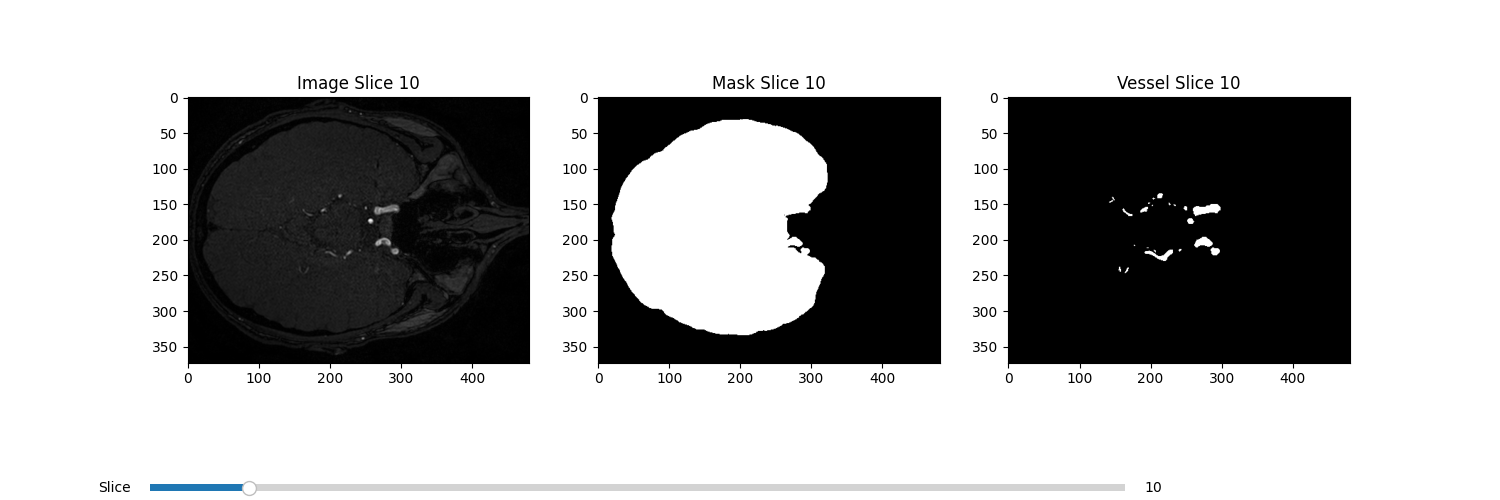

In [10]:
plot_slices_with_cursor(img_np, rough_mask_np, true_image_np)

### PREPROCESSED DATA

Number of skull stripped images: 66: ['013_mask.nii.gz', '003_img.nii.gz', '017_img.nii.gz', '012_label.nii.gz', '016_mask.nii.gz', '009_mask.nii.gz', '009_label.nii.gz', '011_img.nii.gz', '021_label.nii.gz', '010_label.nii.gz', '016_img.nii.gz', '021_mask.nii.gz', '005_img.nii.gz', '020_img.nii.gz', '002_label.nii.gz', '004_img.nii.gz', '010_img.nii.gz', '013_label.nii.gz', '001_img.nii.gz', '022_img.nii.gz', '014_mask.nii.gz', '017_label.nii.gz', '019_img.nii.gz', '014_img.nii.gz', '013_img.nii.gz', '020_mask.nii.gz', '015_label.nii.gz', '022_mask.nii.gz', '019_mask.nii.gz', '015_img.nii.gz', '002_mask.nii.gz', '007_label.nii.gz', '019_label.nii.gz', '005_label.nii.gz', '016_label.nii.gz', '001_mask.nii.gz', '021_img.nii.gz', '008_img.nii.gz', '003_mask.nii.gz', '015_mask.nii.gz', '004_mask.nii.gz', '005_mask.nii.gz', '009_img.nii.gz', '020_label.nii.gz', '018_label.nii.gz', '007_mask.nii.gz', '006_img.nii.gz', '007_img.nii.gz', '006_label.nii.gz', '011_label.nii.gz', '008_mask.nii.g

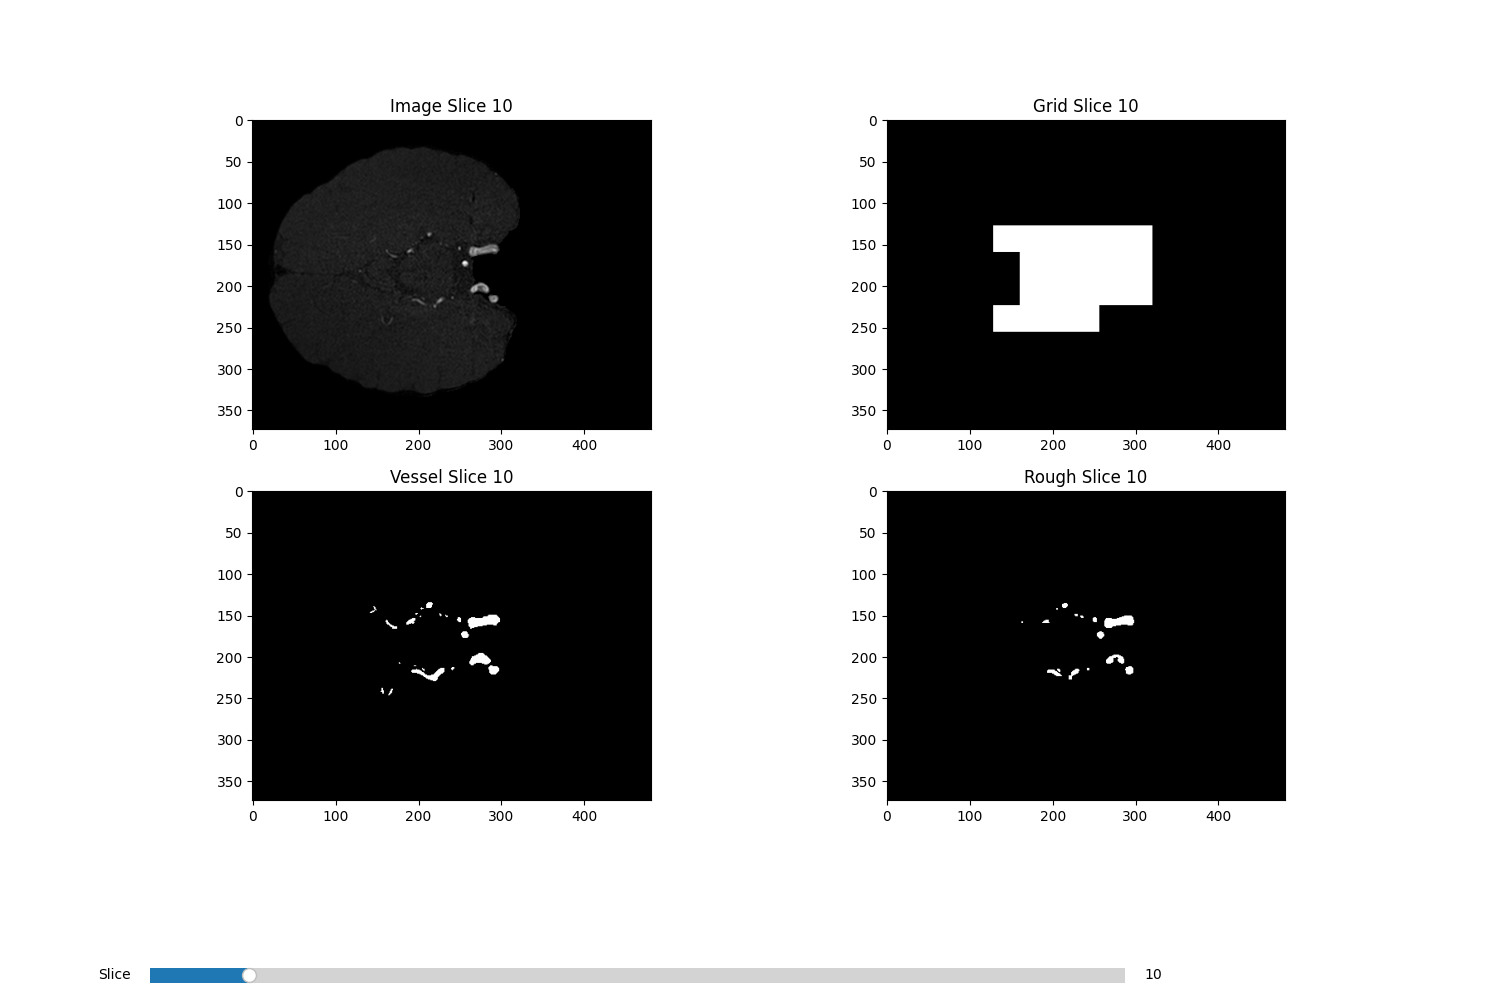

In [19]:
skull_stripped_path = os.path.join(preprocessed_data_path, '1_skull_stripped_images')
grid_path = os.path.join(preprocessed_data_path, '2_grid_images')
rough_mask_path = os.path.join(preprocessed_data_path, '3_dil_kmeans_rough_mask_dir')

all_skull_stripped = os.listdir(skull_stripped_path)
print(f"Number of skull stripped images: {len(all_skull_stripped)}: {all_skull_stripped}")
all_skull_stripped_label = [file for file in all_skull_stripped if 'label' in file]
all_skull_stripped_img = [file for file in all_skull_stripped if 'mask' not in file and 'label' not in file]

all_grid = os.listdir(grid_path)
all_rough_mask = os.listdir(rough_mask_path)

#assert len(all_skull_stripped_label) == len(all_skull_stripped_img) == len(all_grid) == len(all_rough_mask)

# Extract the Image that starts with the ID
img = [file for file in all_skull_stripped_img if file.startswith(str(ID))]
label = [file for file in all_skull_stripped_label if file.startswith(str(ID))]
grid = [file for file in all_grid if file.startswith(str(ID))]
rough = [file for file in all_rough_mask if file.startswith(str(ID))]

assert len(img) == len(label) == len(grid) == len(rough) == 1, f'Found more than one file for ID {ID}: {img}, {label}, {grid}, {rough}'

img = img[0]
label = label[0]
grid = grid[0]
rough = rough[0]

print(f'IMG: {img}')
print(f'LABEL: {label}')
print(f"GRID {grid}")
print(f"ROUGH {rough}")

img_np = nib.load(os.path.join(skull_stripped_path, img)).get_fdata()
print(f'Shape: {img_np.shape}, Max: {img_np.max()}, Min: {img_np.min()}')
grid_np  = nib.load(os.path.join(grid_path, grid)).get_fdata()
label_np = nib.load(os.path.join(skull_stripped_path, label)).get_fdata()
rough_np = nib.load(os.path.join(rough_mask_path, rough)).get_fdata()

plot_slices_with_cursor(img_np, grid_np, label_np, rough_np, cursor_position=10)



Max and min: 1.0, 0.0 (ORIGINAL)


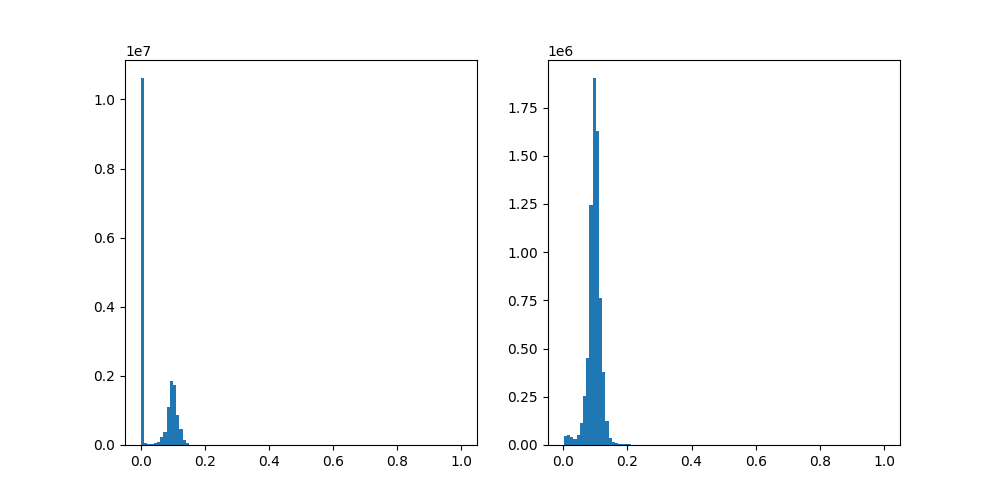

Threshold: 0.19337979094076663


In [20]:
import numpy as np

def enhance_vessels_3d(volume):
    enhanced_volume = np.zeros_like(volume)

    print(f"Max and min: {volume.max()}, {volume.min()} (ORIGINAL)")
    
    fig, axs = plt.subplots(1,2, figsize=(10, 5))

    # Plot histogram of all values
    axs[0].hist(volume.flatten(), bins=100)

    # Plot histogram of positive values
    axs[1].hist(volume[volume > 0].flatten(), bins=100)

    plt.show()
    
    # threshold 98% of the values
    threshold = np.percentile(volume[volume > 0], 99.5)
    print(f"Threshold: {threshold}")
    enhanced_volume = np.where(volume > threshold, 5*threshold, 0)
    

    return enhanced_volume

enhanced_img_np = enhance_vessels_3d(img_np)


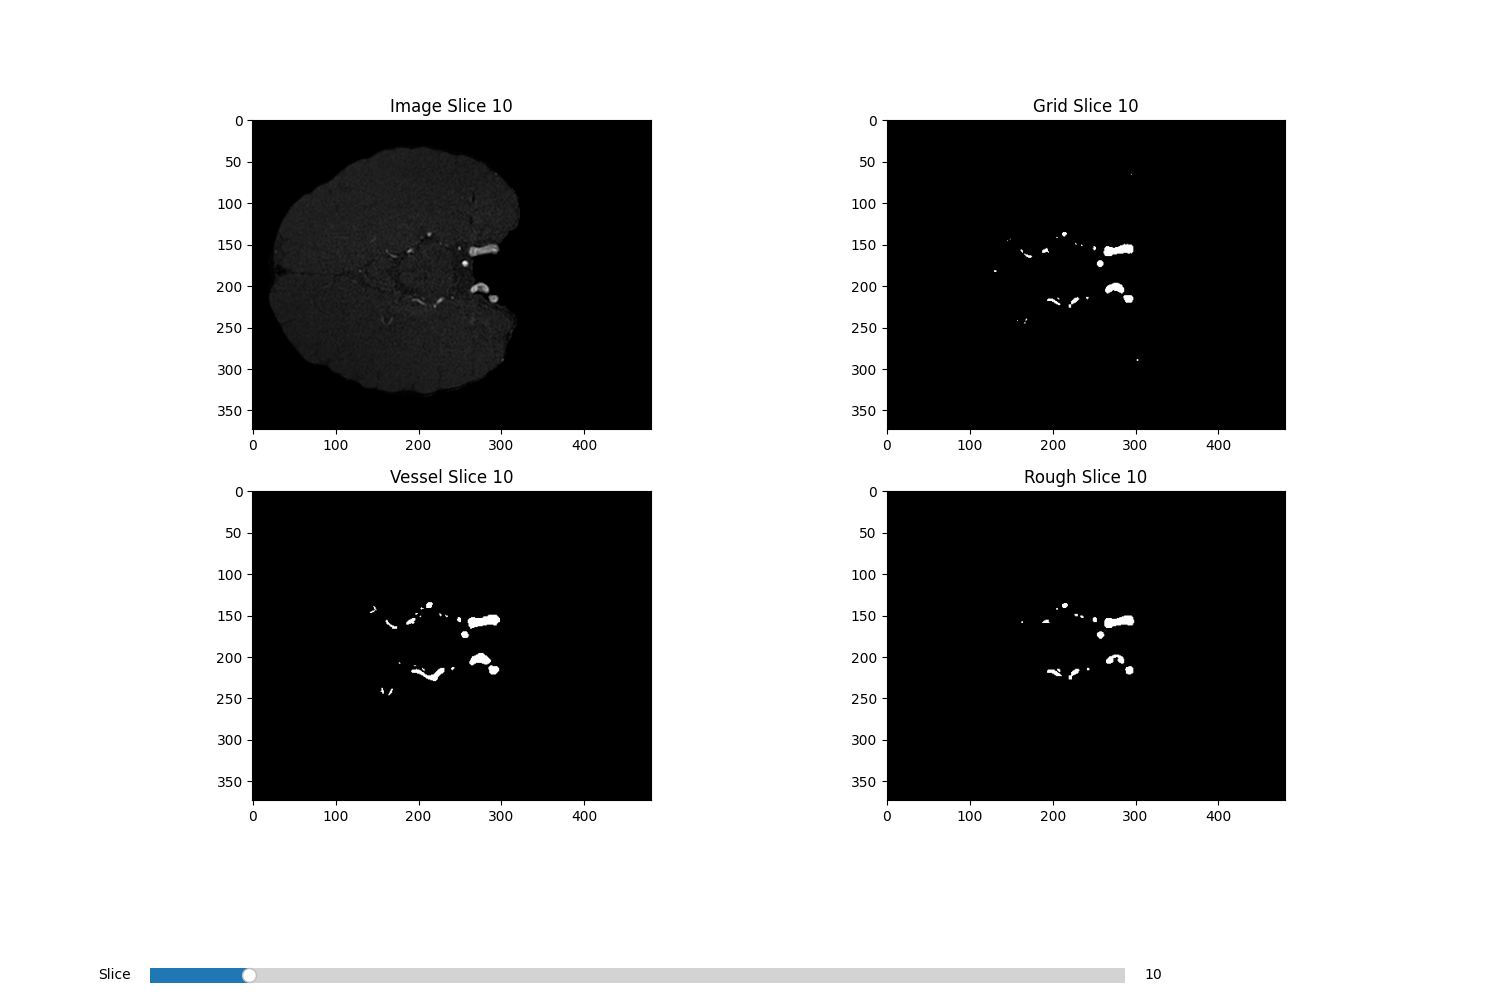

In [31]:
plot_slices_with_cursor(img_np, enhanced_img_np, label_np, rough_np, cursor_position=10)

In [21]:
grid_patches = os.path.join(preprocessed_data_path, '4_grid_patch_vessel')

In [22]:
kmeans_patches = os.path.join(preprocessed_data_path, '5_kmeans_seg_weak_patch_extraction')
if os.path.exists(kmeans_patches):
    print("Kmeans path exists")
else:
    kmeans_patches = os.path.join(preprocessed_data_path, f'5_dil_kmeans_seg_weak_patch_extraction')
true_patches_path = os.path.join(preprocessed_data_path, '5_seg_true_patch_extraction')

In [23]:
def plot_patches_with_cursor_pnet(vessel_np, empty_np, cursor_position=10):
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    
    def update(val):
        slice_index = int(slider.val)
        slice_index_vessel = slice_index
        
        if slice_index_vessel >= vessel_np.shape[0]:
            slice_index_vessel = vessel_np.shape[0] - 1
            
        ax[0].imshow(vessel_np[slice_index_vessel,:,:], cmap='gray')
        ax[0].set_title(f'VESSEL Patch {slice_index_vessel}')
        ax[1].imshow(empty_np[slice_index,:,:], cmap='gray')
        ax[1].set_title(f'EMPTY Patch {slice_index}')
        fig.canvas.draw_idle()

    slider_ax = plt.axes([0.1, 0.01, 0.65, 0.03])
    slider = Slider(slider_ax, 'Slice', 0, empty_np.shape[0] - 1, valinit=cursor_position, valstep=1)
    slider.on_changed(update)
    plt.subplots_adjust(bottom=0.2)

    # Initialize the plot
    update(cursor_position)
    
    
    plt.show()

In [24]:
if os.path.exists(grid_patches):
    all_patches = os.listdir(grid_patches)


    all_empty_patches = [file for file in all_patches if 'empty' in file]
    all_vessel_patches = [file for file in all_patches if 'empty' not in file]

    assert len(all_empty_patches) == len(all_vessel_patches)

    empty_patch = [file for file in all_empty_patches if file.startswith(str(ID))]
    vessel_patch = [file for file in all_vessel_patches if file.startswith(str(ID))]

    assert len(empty_patch) == len(vessel_patch) == 1

    empty_patch = empty_patch[0]
    vessel_patch = vessel_patch[0]

    print(f'EMPTY PATCH: {empty_patch}')
    print(f'VESSEL PATCH: {vessel_patch}')

    empty_patch_np = np.load(os.path.join(grid_patches, empty_patch))
    vessel_patch_np = np.load(os.path.join(grid_patches, vessel_patch))

    assert empty_patch_np.shape[1:] == vessel_patch_np.shape[1:]

    print(f"\nPatch shape: {empty_patch_np.shape[1:]}")
    print(f"Num of empty patches: {empty_patch_np.shape[0]}")
    print(f"Num of vessel patches: {vessel_patch_np.shape[0]}")

    plot_patches_with_cursor_pnet(vessel_patch_np, empty_patch_np, cursor_position=10)
    
else:
    print(f"Grid patches not found in {grid_patches}: make sure to have run preprocessing for PNet")

Grid patches not found in /home/driss/data_vessel_npy/4_grid_patch_vessel: make sure to have run preprocessing for PNet


In [25]:
def plot_patches_with_cursor_wnet(img_np, rough_mask_np, true_image_np, true_vessel_np, cursor_position=10):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    
    def update(val):
        slice_index = int(slider.val)
        ax[0, 0].imshow(img_np[slice_index,:,:], cmap='gray')
        ax[0, 0].set_title(f'Image Slice {slice_index}')
        ax[0, 1].imshow(rough_mask_np[slice_index,:,:], cmap='gray')
        ax[0, 1].set_title(f'Rough Vessel Slice {slice_index}')
        ax[1, 0].imshow(true_image_np[slice_index,:,:], cmap='gray')
        ax[1, 0].set_title(f'Image Slice {slice_index}')
        ax[1, 1].imshow(true_vessel_np[slice_index,:,:], cmap='gray')
        ax[1, 1].set_title(f'True Vessel Slice {slice_index}')
        
        fig.canvas.draw_idle()

    slider_ax = plt.axes([0.1, 0.01, 0.65, 0.03])
    slider = Slider(slider_ax, 'Slice', 0, img_np.shape[0] - 1, valinit=cursor_position, valstep=1)
    slider.on_changed(update)
    plt.subplots_adjust(bottom=0.2)

    # Initialize the plot
    update(cursor_position)
    
    
    plt.show()

In [26]:
print(true_patches_path)

/home/driss/data_vessel_npy/5_seg_true_patch_extraction


KMEANS IMG: 002_32_img.npy
KMEANS LABEL: 002_32_label.npy
TRUE IMG: 002_32_img.npy
TRUE LABEL: 002_32_label.npy
 Kmeans Image shape: (1000, 32, 32) for 002_32_img.npy


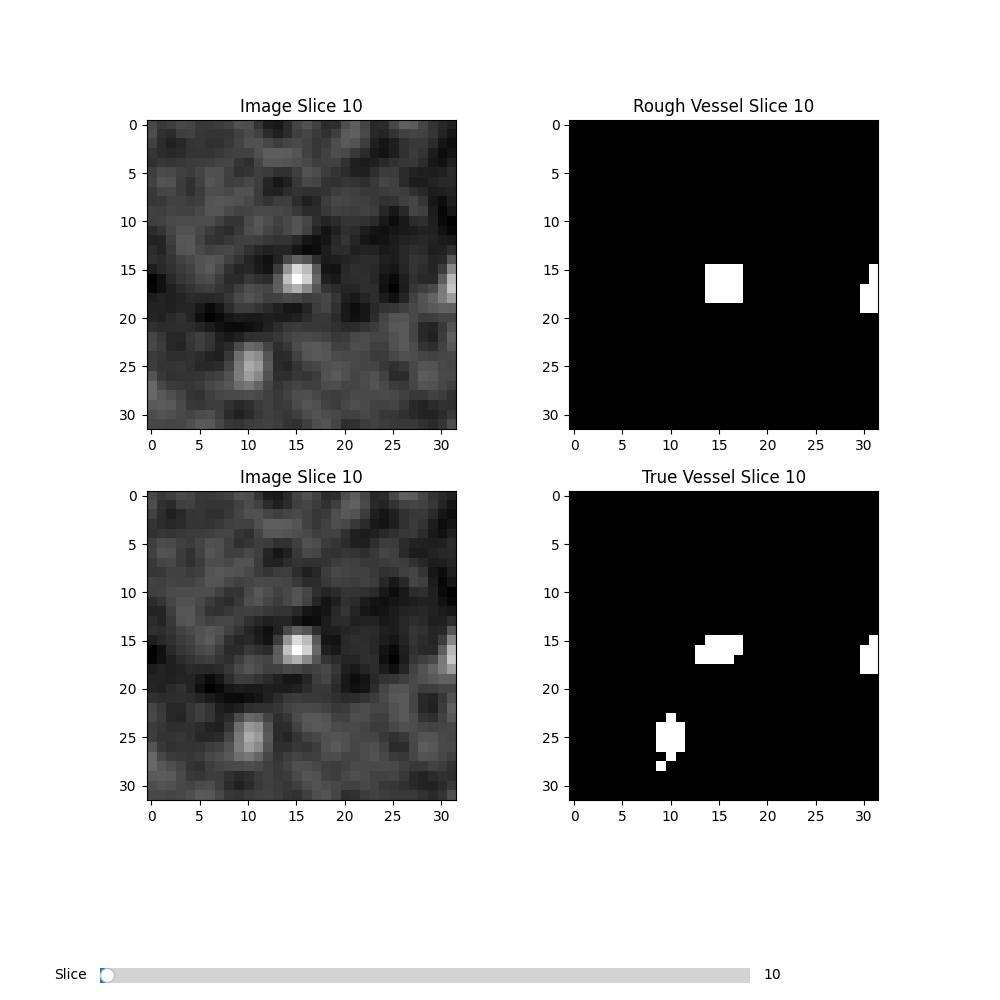

In [27]:
all_kmeans_patches = os.listdir(kmeans_patches)
all_true_patches = os.listdir(true_patches_path)

all_kmeans_img = [file for file in all_kmeans_patches if 'img' in file]
all_kmeans_label = [file for file in all_kmeans_patches if 'label' in file]

all_true_img = [file for file in all_true_patches if 'img' in file]
all_true_label = [file for file in all_true_patches if 'label' in file]

assert len(all_kmeans_img) == len(all_kmeans_label) == len(all_true_img) == len(all_true_label)

# Extract the Image that starts with the ID
kmeans_img = [file for file in all_kmeans_img if file.startswith(str(ID))]
kmeans_label = [file for file in all_kmeans_label if file.startswith(str(ID))]

true_img = [file for file in all_true_img if file.startswith(str(ID))]
true_label = [file for file in all_true_label if file.startswith(str(ID))]

assert len(kmeans_img) == len(kmeans_label) == len(true_img) == len(true_label) == 1, f'Found more than one file for ID {ID}: {kmeans_img}, {kmeans_label}, {true_img}, {true_label}'

kmeans_img = kmeans_img[0]
kmeans_label = kmeans_label[0]

true_img = true_img[0]
true_label = true_label[0]

print(f'KMEANS IMG: {kmeans_img}')
print(f'KMEANS LABEL: {kmeans_label}')
print(f'TRUE IMG: {true_img}')
print(f'TRUE LABEL: {true_label}')

kmeans_img_np = np.load(os.path.join(kmeans_patches, kmeans_img))
kmeans_label_np = np.load(os.path.join(kmeans_patches, kmeans_label))

true_img_np = np.load(os.path.join(true_patches_path, true_img))
true_label_np = np.load(os.path.join(true_patches_path, true_label))

assert kmeans_img_np.shape == kmeans_label_np.shape == true_img_np.shape == true_label_np.shape, f"Shapes do not match: {kmeans_img_np.shape}, {kmeans_label_np.shape}, {true_img_np.shape}, {true_label_np.shape}"
print(f" Kmeans Image shape: {kmeans_img_np.shape} for {true_img}")

plot_patches_with_cursor_wnet(kmeans_img_np, kmeans_label_np, true_img_np, true_label_np)

In [28]:
indexes = [33, 106, 113, 178, 201, 221, 234, 298, 309, 342, 445, 449, 473, 484]

import random 

indexes = random.sample(range(0, kmeans_img_np.shape[0]), 10)
print(indexes)

[609, 298, 783, 593, 107, 251, 519, 119, 574, 377]


[743, 155, 449, 339, 945, 918, 819, 100, 147, 979]


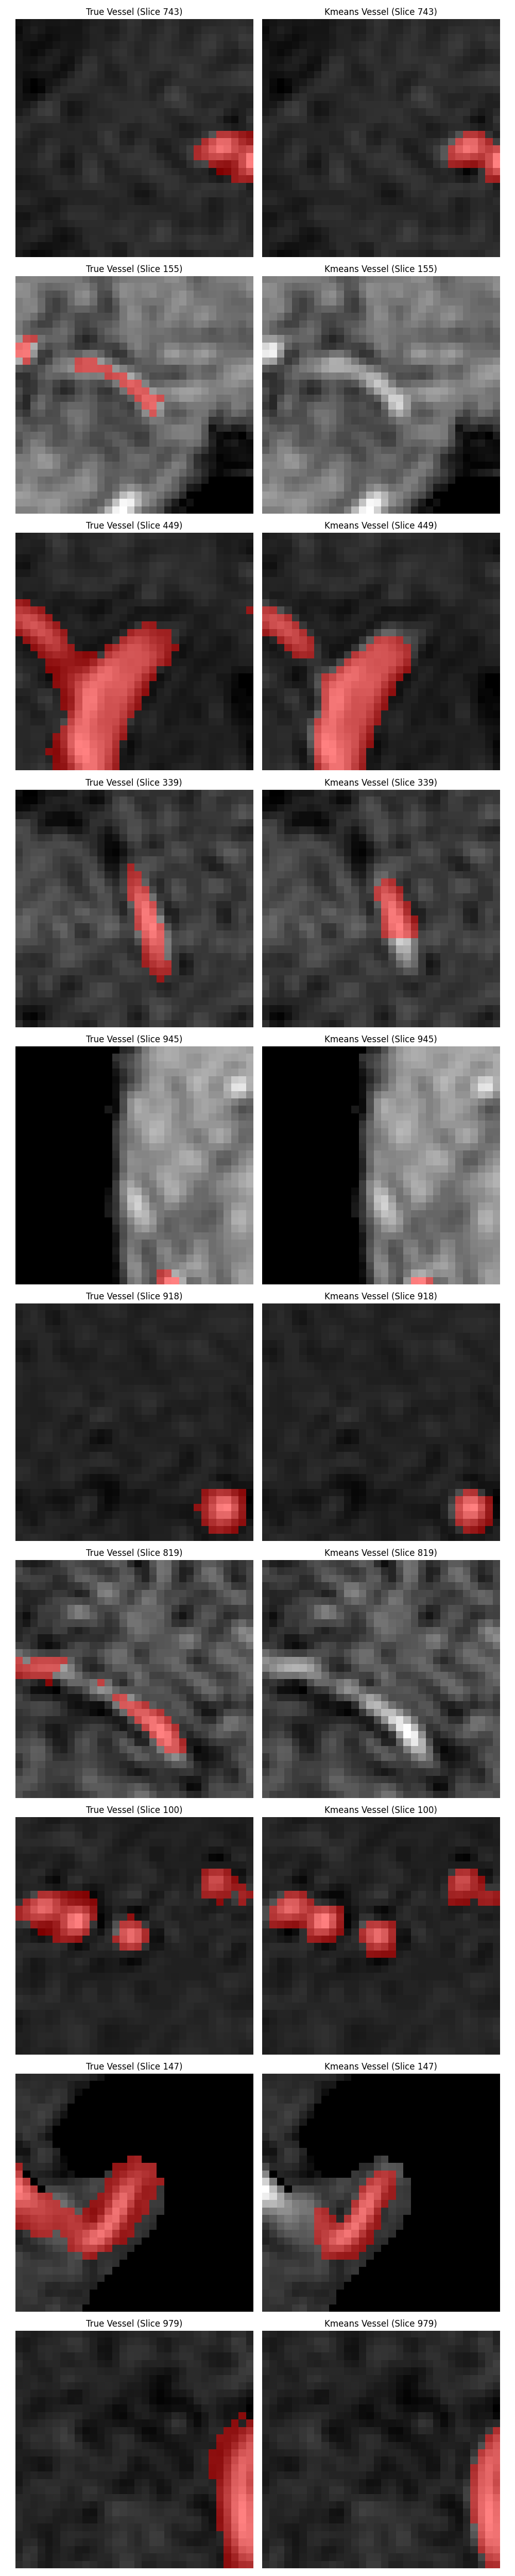

In [29]:
import matplotlib.pyplot as plt
import numpy as np

indexes = random.sample(range(0, kmeans_img_np.shape[0]), 10)
print(indexes)

def plot_10_patches(img_np, true_vessel_np, kmeans_label_np):
    
    random_indexes = np.random.randint(0, img_np.shape[0], size=5)
    random_indexes = indexes
    
    n = len(random_indexes)
    alpha = 0.5
    
    fig, ax = plt.subplots(n, 2, figsize=(10, 5*n))
    
    for i, index in enumerate(indexes):
        # Display original image where mask is 0 and red mask where mask is 1 for true_vessel_np
        img_true_vessel = np.copy(img_np[index])
        mask_true_vessel = np.ma.masked_where(true_vessel_np[index] != 1, true_vessel_np[index])
        ax[i, 0].imshow(img_true_vessel, cmap='gray')
        ax[i, 0].imshow(mask_true_vessel, cmap='bwr', alpha=alpha, vmin=0, vmax=1)
        ax[i, 0].set_title(f'True Vessel (Slice {index})')
        
        # Display original image where mask is 0 and red mask where mask is 1 for kmeans_label_np
        img_kmeans = np.copy(img_np[index])
        mask_kmeans = np.ma.masked_where(kmeans_label_np[index] != 1, kmeans_label_np[index])
        ax[i, 1].imshow(img_kmeans, cmap='gray')
        ax[i, 1].imshow(mask_kmeans, cmap='bwr', alpha=alpha, vmin=0, vmax=1)
        ax[i, 1].set_title(f'Kmeans Vessel (Slice {index})')
        
        for j in range(2):
            ax[i, j].axis('off')
        
        for j in range(2):
            ax[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

    
plot_10_patches(true_img_np, true_label_np, kmeans_label_np)

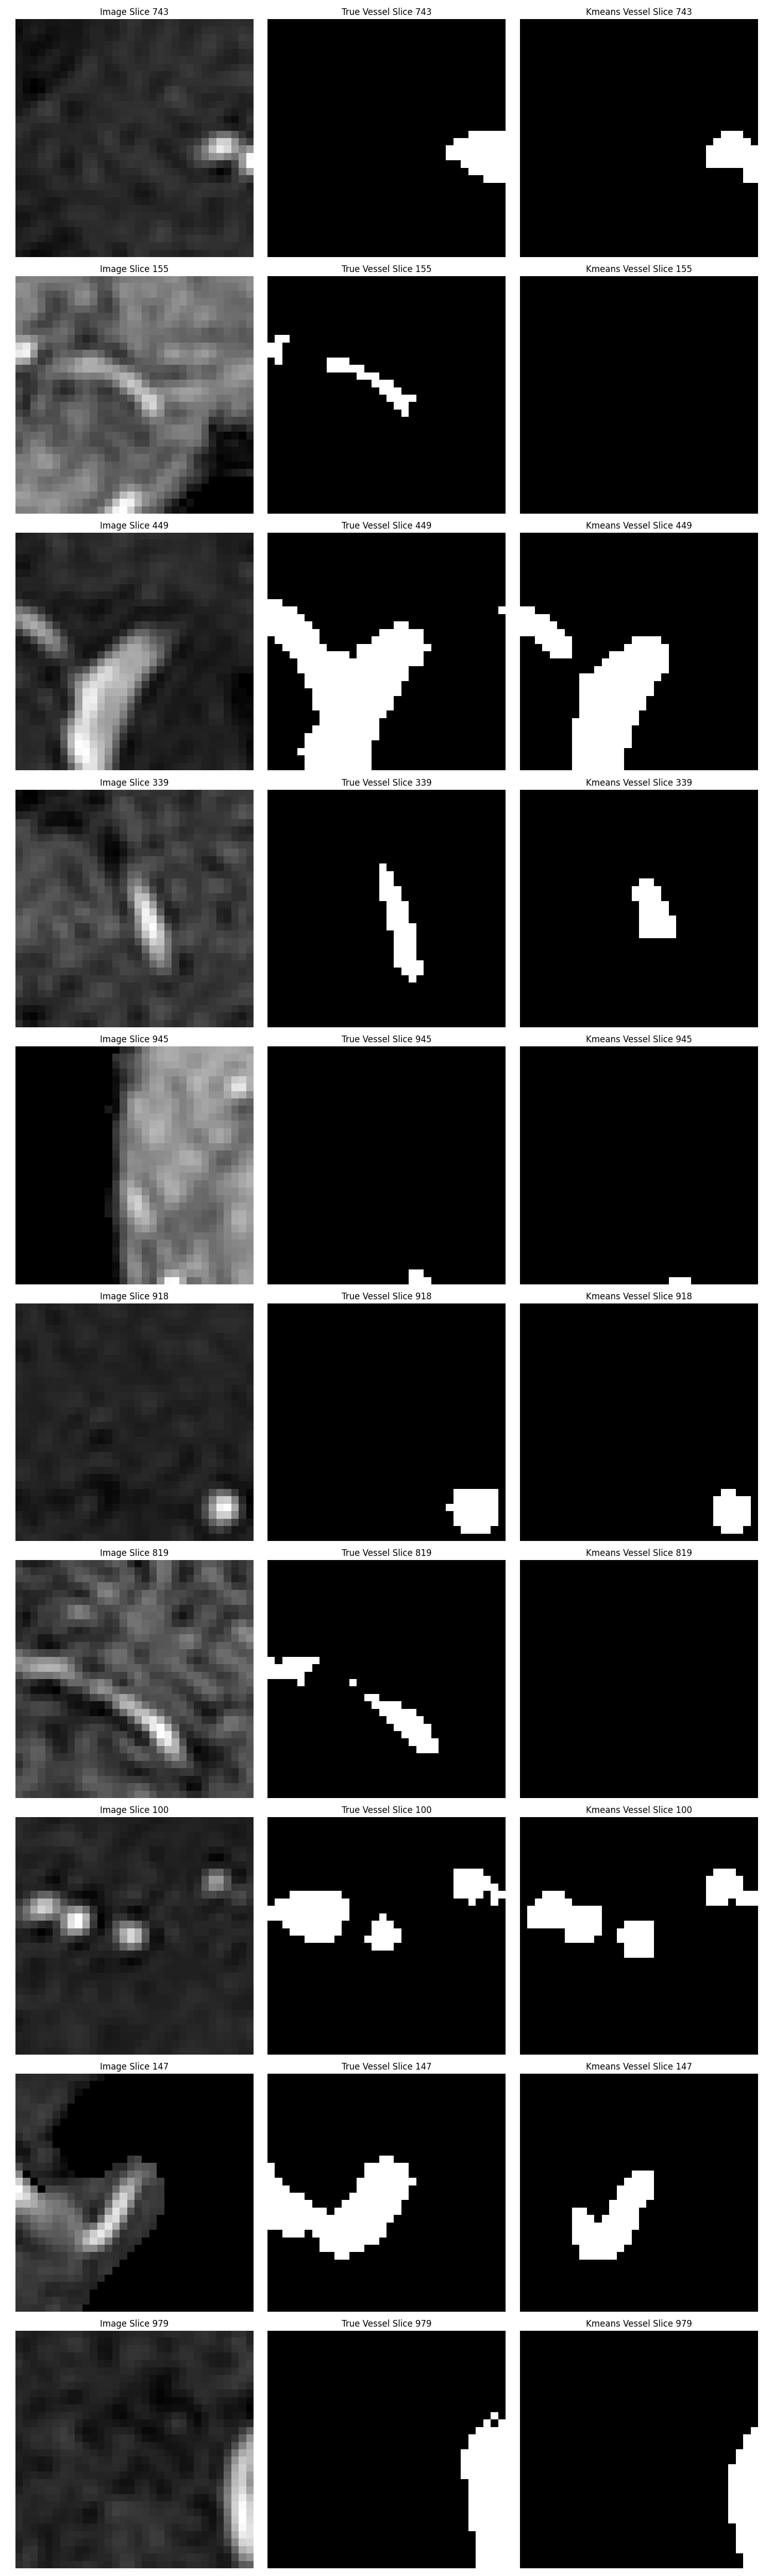

In [30]:
def plot_10_patches(img_np, true_vessel_np, kmeans_label_np):
    
    random_indexes = np.random.randint(0, img_np.shape[0], size=5)
    random_indexes = indexes
    
    n = len(random_indexes)
    
    fig, ax = plt.subplots(n, 3, figsize=(15, 5*n))
    
    for i, index in enumerate(random_indexes):
        #print(f"Shape: {img_np[index,:,:].shape}, Max: {img_np[index,:,:].max()}, Min: {img_np[index,:,:].min()}")
        #print(f"Shape: {true_vessel_np[index,:,:].shape}, Max: {true_vessel_np[index,:,:].max()}, Min: {true_vessel_np[index,:,:].min()}")
        #print(f"Shape: {kmeans_label_np[index,:,:].shape}, Max: {kmeans_label_np[index,:,:].max()}, Min: {kmeans_label_np[index,:,:].min()}\n")
        ax[i, 0].imshow(img_np[index,:,:], cmap='gray')
        ax[i, 0].set_title(f'Image Slice {index}')
        ax[i, 1].imshow(true_vessel_np[index,:,:], cmap='gray')
        ax[i, 1].set_title(f'True Vessel Slice {index}')
        ax[i, 2].imshow(kmeans_label_np[index,:,:], cmap='gray')
        ax[i, 2].set_title(f'Kmeans Vessel Slice {index}')
        
        # remove axis
        for j in range(3):
            ax[i, j].axis('off')
    
    
    plt.tight_layout()
    plt.show()

plot_10_patches(true_img_np, true_label_np, kmeans_label_np)

In [31]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
plt.ion() 

def plot_empy_with_cursor(img_np, vessel_np, cursor_position=10):  
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    def update(val):
        slice_index = int(slider.val)
        ax[0].imshow(img_np[slice_index,:,:], cmap='gray')
        ax[0].set_title(f'Image Slice {slice_index}')
        ax[1].imshow(vessel_np[slice_index,:,:], cmap='gray')
        ax[1].set_title(f'Vessel Slice {slice_index}')
        fig.canvas.draw_idle()

    slider_ax = plt.axes([0.1, 0.01, 0.65, 0.03])
    slider = Slider(slider_ax, 'Slice', 0, img_np.shape[0] - 1, valinit=cursor_position, valstep=1)
    slider.on_changed(update)
    plt.subplots_adjust(bottom=0.2)

    # Initialize the plot
    update(cursor_position)

    
    plt.show()

In [32]:
if 'empty' in preprocessed_data_path:
    empty_patches_path = os.path.join(preprocessed_data_path, '5_seg_empty_patch_extraction')
    all_empty_patches = os.listdir(empty_patches_path)
    empty_img = [file for file in all_empty_patches if file.startswith(str(ID)) and 'img' in file]
    empty_label = [file for file in all_empty_patches if file.startswith(str(ID)) and 'label' in file]
    assert len(empty_img) == 1 and len(empty_label) == 1
    empty_img = empty_img[0]
    empty_label = empty_label[0]
    
    empty_img_np = np.load(os.path.join(empty_patches_path, empty_img))
    empty_label_np = np.load(os.path.join(empty_patches_path, empty_label))
    
    assert empty_img_np.shape == empty_label_np.shape
    print(f"Empty Image shape: {empty_img_np.shape}")
    plot_empy_with_cursor(empty_img_np, empty_label_np)
    

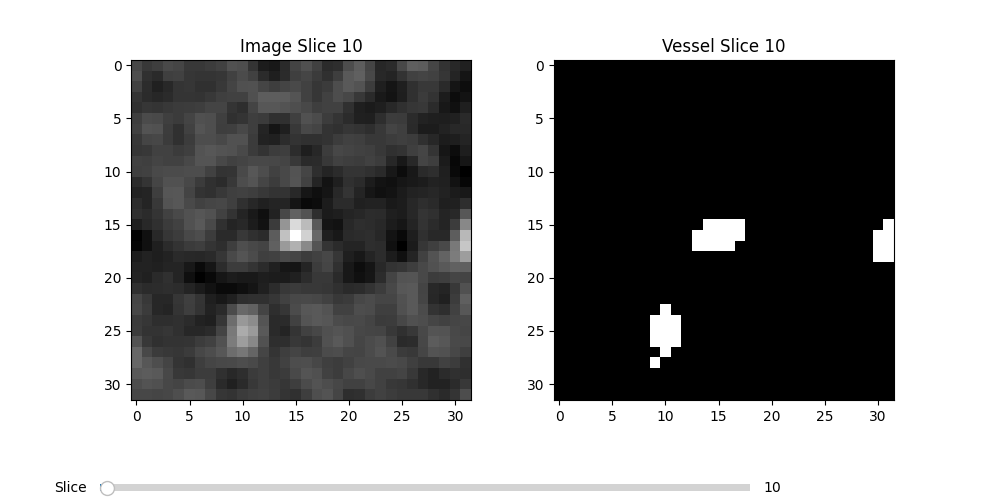

Empty Image shape: (1000, 32, 32)


In [33]:
plot_empy_with_cursor(true_img_np, true_label_np)
print(f"Empty Image shape: {true_img_np.shape}")

In [27]:
aaa = np.load('/data/falcetta/brain_data/IXI/processed/numpy_renamed/patches_preprocessed_with_empty/5_seg_empty_patch_extraction/001_32_img.npy')
aaa.shape

(500, 32, 32)